In [ ]:
# I need to use this version because Matlab has this version as well
!pip install scikit-learn==1.3.0

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.8/10.8 MB 15.9 MB/s eta 0:00:00
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.2.2
    Uninstalling scikit-learn-1.2.2:
      Successfully uninstalled scikit-learn-1.2.2


In [ ]:
!pip show scikit-learn

Name: scikit-learn
Version: 1.3.0
Summary: A set of python modules for machine learning and data mining
Home-page: http://scikit-learn.org
Author: 
Author-email: 
License: new BSD
Location: /usr/local/lib/python3.10/dist-packages
Requires: joblib, numpy, scipy, threadpoolctl
Required-by: bigframes, fastai, imbalanced-learn, librosa, mlxtend, qudida, sklearn-pandas, yellowbrick


In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
# This library is needed to save RF model
import joblib
import statistics
import numpy as np
import pandas as pd
import seaborn as sn
from sklearn.svm import SVC
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

In [ ]:
dataset = pd.read_csv('/content/Dataset.csv')

In [ ]:
dataset = dataset
dataset.head(5)

,X_dist,Y_dist,Z_dist,distance,Touch
0,-0.009475,-0.180581,0.195063,0.265987,1
1,-0.108954,-0.327331,0.358278,0.497373,0
2,0.339606,-0.549481,0.175158,0.669285,1
3,-0.302339,-0.312481,0.098086,0.445729,0
4,0.194914,-0.191235,-0.012477,0.273346,1


# **Data Preprocessing**


In [ ]:
row_number, col_number = dataset.shape
print(f'The dataset contains {row_number} rows and {col_number} columns.')

The dataset contains 987 rows and 5 columns.


In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 987 entries, 0 to 986
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   X_dist    987 non-null    float64
 1   Y_dist    987 non-null    float64
 2   Z_dist    987 non-null    float64
 3   distance  987 non-null    float64
 4   Touch     987 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 38.7 KB


In [ ]:
# Check for duplicate values
dataset[dataset.duplicated()]
# or  dataset[dataset.duplicated()].sum()

,X_dist,Y_dist,Z_dist,distance,Touch


As we can see above, there isn't any duplicated record in the dataset.

In [ ]:
# Check missing values
null_columns = dataset.columns[dataset.isnull().any()]

print('List of columns consisting null values and their quantity:')
print(dataset[null_columns].isnull().sum())

List of columns consisting null values and their quantity:
Series([], dtype: float64)


There is no missing values in this dataset.

**Data Distribution**

Here, the distribution of the values in each column of the dataset is shown.

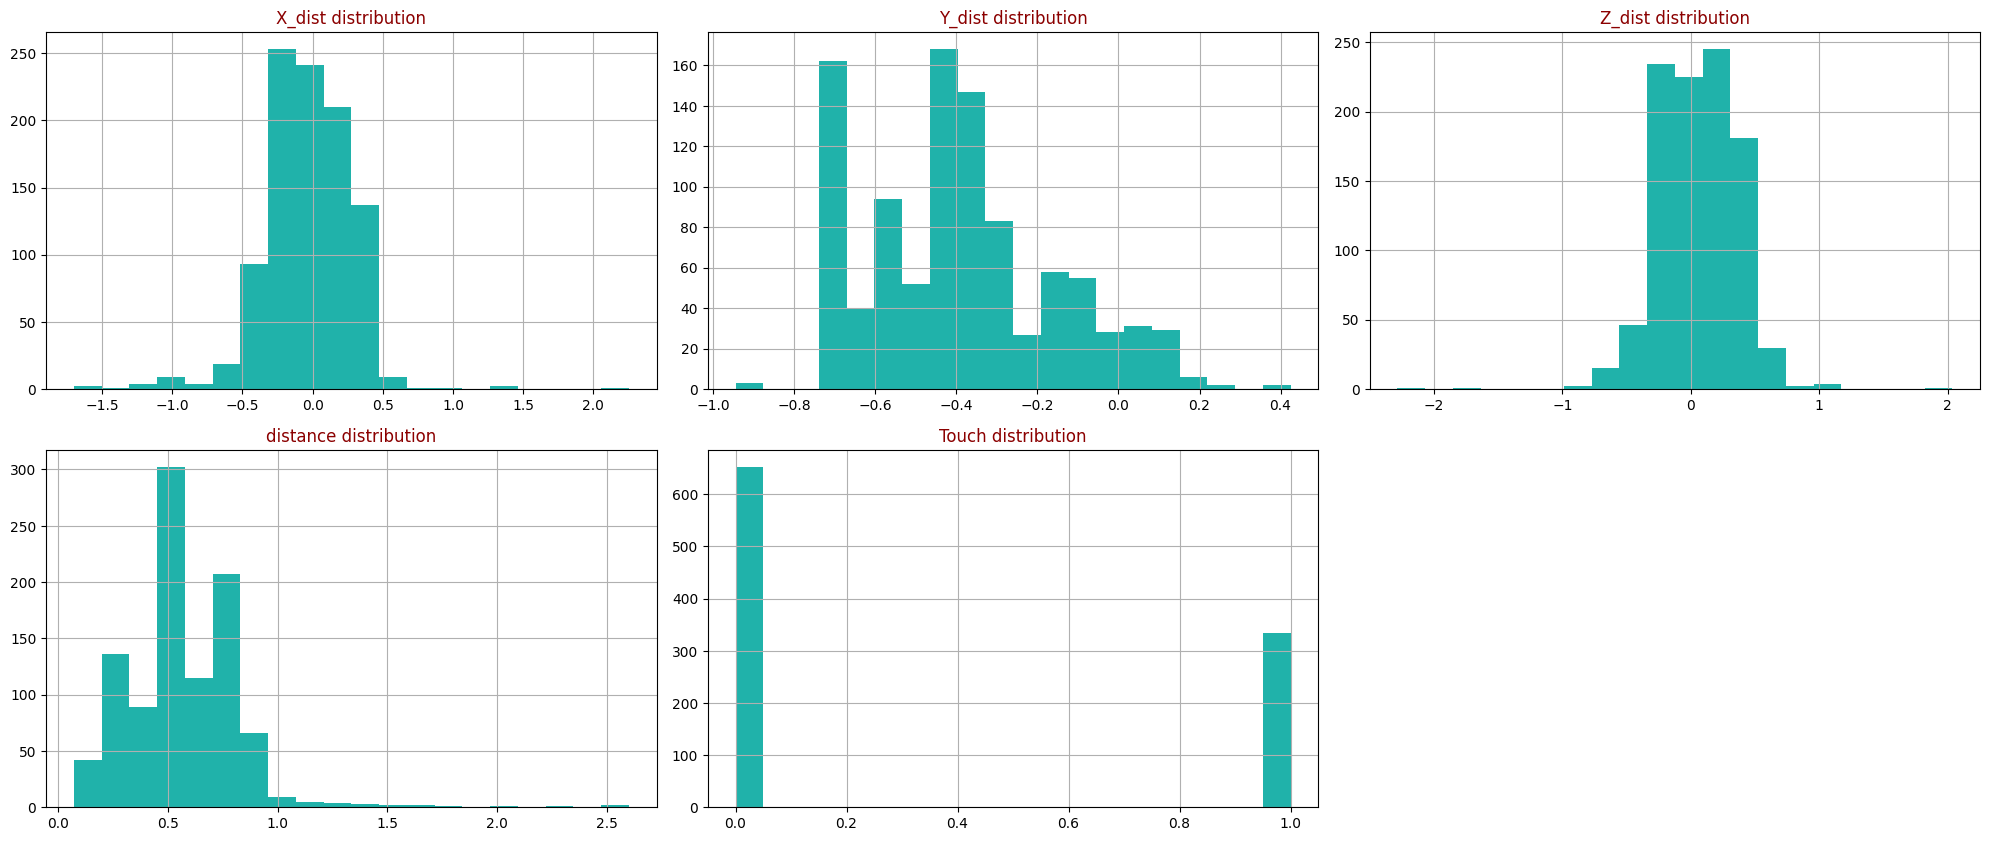

In [ ]:
fig=plt.figure(figsize=(20,25))

for index, column in enumerate(dataset.columns):
    ax = fig.add_subplot(6,3,index+1)
    dataset[column].hist(bins = 20, ax = ax, facecolor = 'LightSeaGreen')
    ax.set_title(column + " distribution",color = 'darkred')

fig.tight_layout()
plt.show()

**Check Correlation**

Showing the correlation between the features using a heatmap.

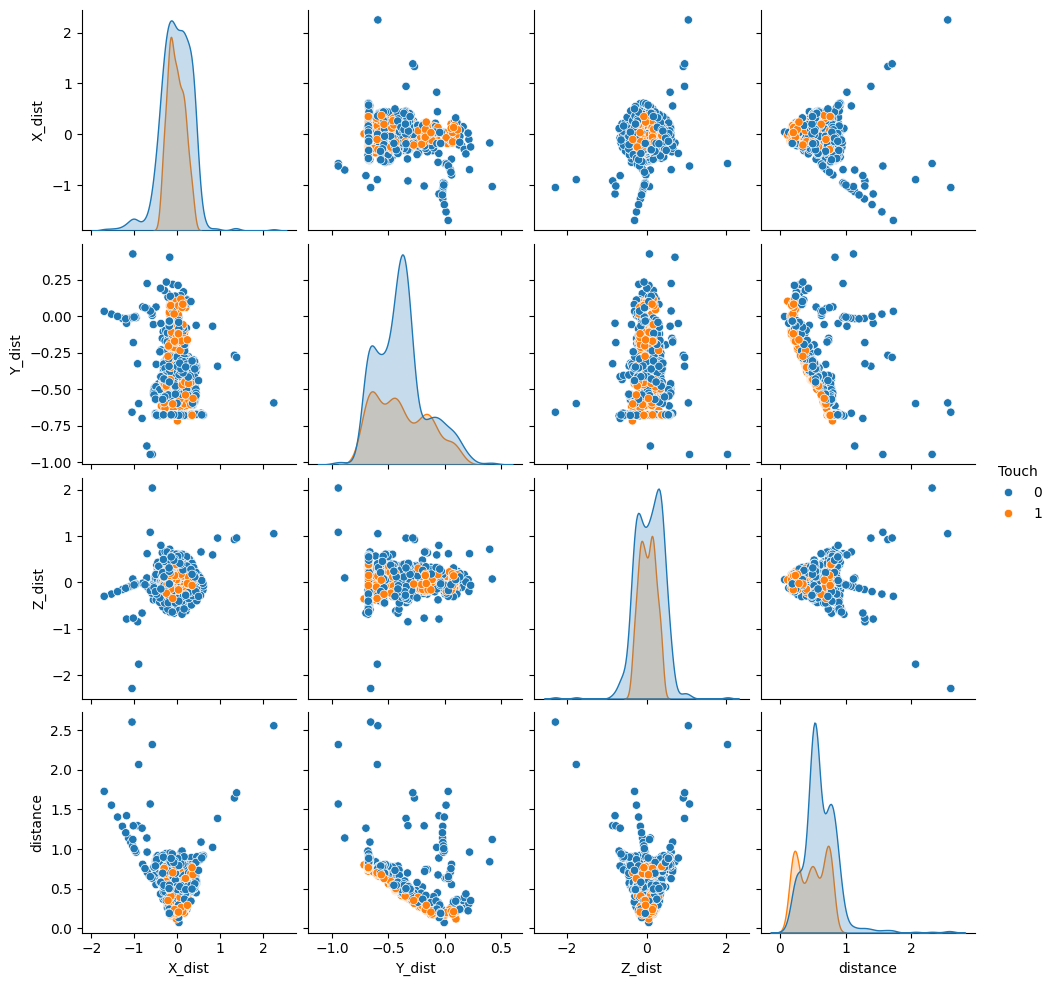

In [ ]:
sn.pairplot(dataset, hue='Touch')

Touch       1.000000
distance    0.246410
Z_dist      0.071854
Y_dist      0.003389
X_dist      0.002784
Name: Touch, dtype: float64

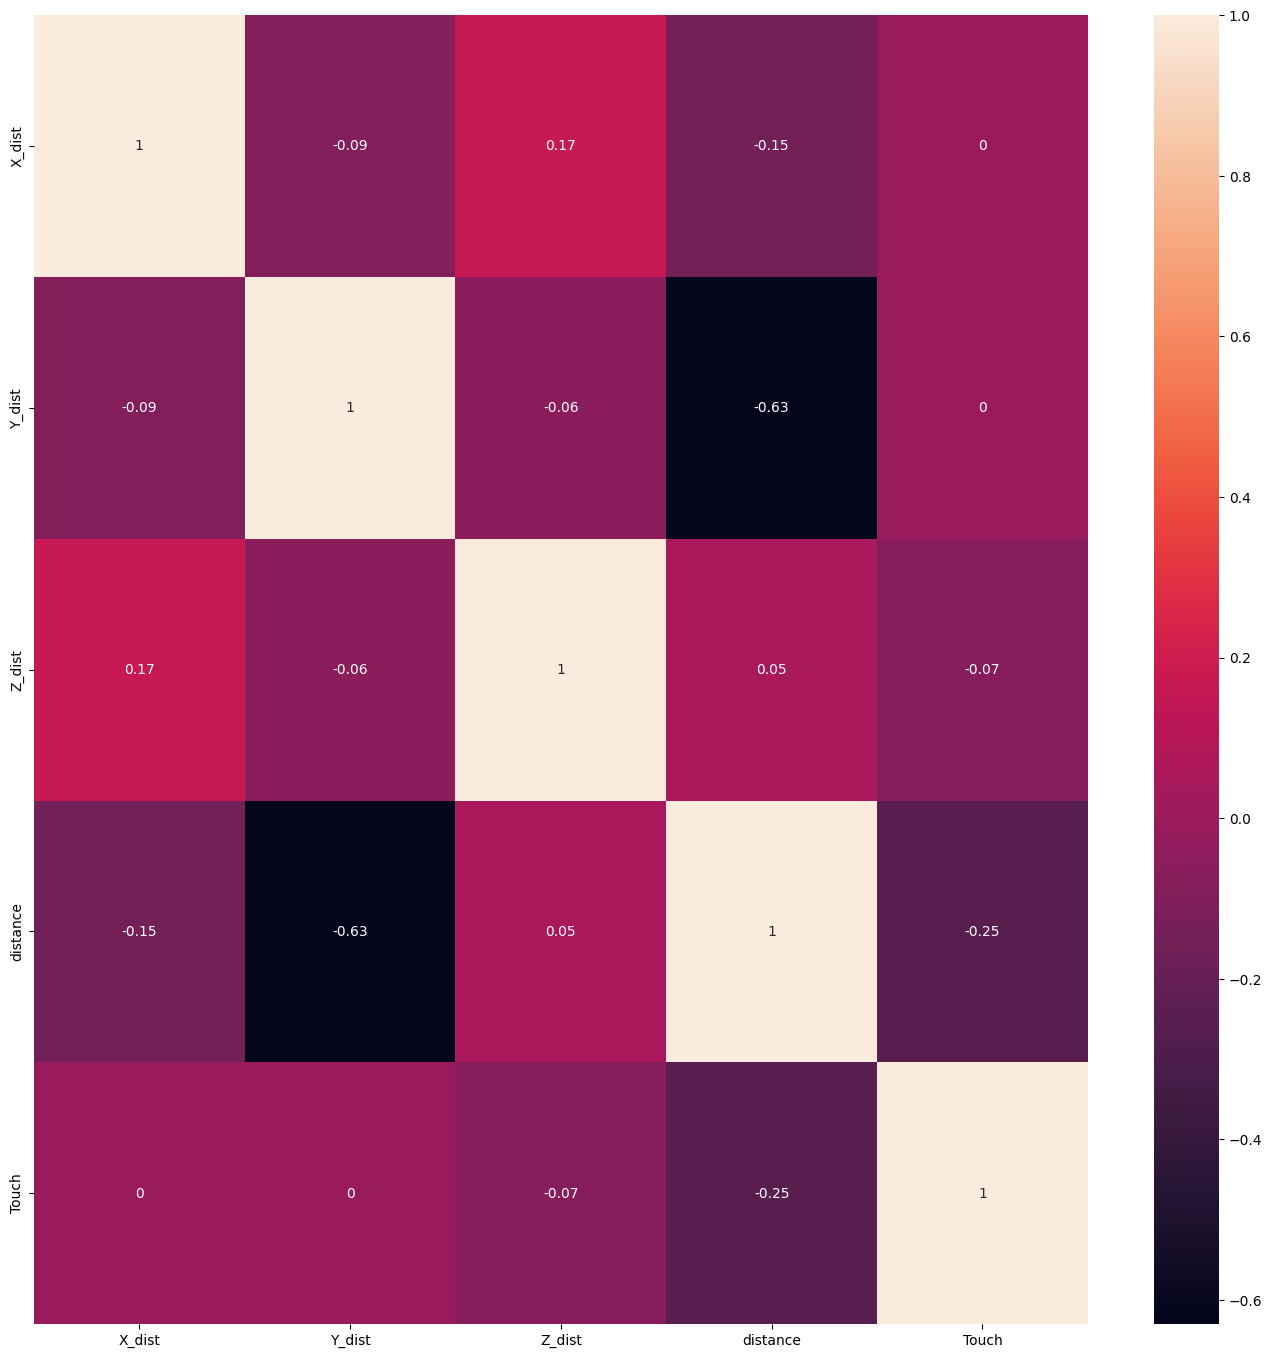

In [ ]:
# This function given the dataset and its target value will produce
# a heatmap which shows the correlation between each column parwise
# and also the target value.
def corr(dataframe,target_variable):

    fig, ax = plt.subplots(figsize=(17,17))
    correlation_matrix = dataframe.corr().round(2)
    sn.heatmap(data=correlation_matrix, annot=True)

    correlation = dataset.corr()[target_variable].abs().sort_values(ascending = False)
    return correlation

corr(dataset,"Touch")

**Checking Balancing**

In [ ]:
dataset.Touch.value_counts()

0    652
1    335
Name: Touch, dtype: int64

<ipython-input-15-706e5f012b4c>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sn.countplot(x='Touch',data=dataset,palette=["#eb383b","#3853eb"])


<Axes: xlabel='Touch', ylabel='count'>

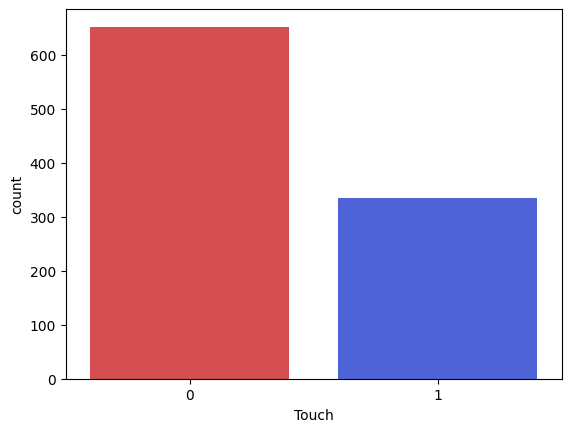

In [ ]:
sn.countplot(x='Touch',data=dataset,palette=["#eb383b","#3853eb"])

#**Learning and Model Selection**

##**Dataset Spliting**

In [ ]:
# Separating target feature from the features
y = dataset['Touch']
X = dataset.drop(columns=['Touch'], axis=1)

In [ ]:
from sklearn.model_selection import train_test_split
import random

X_, X_test, y_, y_test = train_test_split(X, y, test_size = 0.20, random_state= 21)
X_train, X_validation, y_train, y_validation = train_test_split(X_, y_, test_size = 0.20, random_state= 21)

In [ ]:
X_train.shape

(631, 4)

In [ ]:
X_validation.shape

(158, 4)

In [ ]:
X_test.shape

(198, 4)

##**Model Selection**

###**Support Vector Machine**

In [ ]:
# SVM
classifierSVM = SVC(probability=True)
classifierSVM.fit(X_train, y_train)
y_pred_val_SVM = classifierSVM.predict(X_validation)
print("************Results for SVM*************")
print("Confusion Matrix for Validation Set\n")
print(classification_report(y_validation, y_pred_val_SVM))

************Results for SVM*************
Confusion Matrix for Validation Set

              precision    recall  f1-score   support

           0       0.88      0.87      0.87        98
           1       0.79      0.80      0.79        60

    accuracy                           0.84       158
   macro avg       0.83      0.83      0.83       158
weighted avg       0.84      0.84      0.84       158



In [ ]:
y_pred_test_SVM = classifierSVM.predict(X_test)
print("************Results for SVM*************")
print("Confusion Matrix for Test Set\n")
print(classification_report(y_test, y_pred_test_SVM))

************Results for SVM*************
Confusion Matrix for Test Set

              precision    recall  f1-score   support

           0       0.92      0.91      0.91       137
           1       0.79      0.82      0.81        61

    accuracy                           0.88       198
   macro avg       0.86      0.86      0.86       198
weighted avg       0.88      0.88      0.88       198



In [ ]:
y_SVM_pred_prob=classifierSVM.predict_proba(X_test)[::,1]

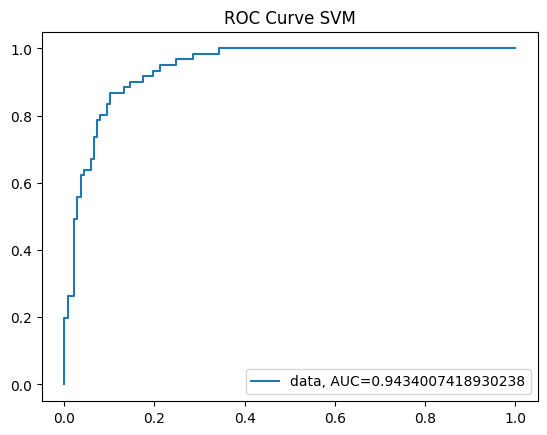

The score for the AUC ROC Curve is: 94.0%


In [ ]:
FPRate_SVM, TPRate_SVM, Threshold_SVM = roc_curve(y_test, y_SVM_pred_prob)
AUC = roc_auc_score(y_test, y_SVM_pred_prob)
plt.plot(FPRate_SVM,TPRate_SVM,label="data, AUC="+str(AUC))
plt.legend(loc=4)
plt.title ('ROC Curve SVM')
plt.show()

print(f"The score for the AUC ROC Curve is: {round(AUC,2)*100}%")

###**MLP**

In [ ]:
# MLP
classifierMLP = MLPClassifier((100,100))
classifierMLP.fit(X_train, y_train)
y_pred_val_MLP = classifierMLP.predict(X_validation)
print("************Results for MLP*************")
print("Confusion Matrix for Validation Set\n")
print(classification_report(y_validation, y_pred_val_MLP))
# classifierMLP.get_params()

************Results for MLP*************
Confusion Matrix for Validation Set

              precision    recall  f1-score   support

           0       0.93      0.90      0.91        98
           1       0.84      0.88      0.86        60

    accuracy                           0.89       158
   macro avg       0.88      0.89      0.89       158
weighted avg       0.89      0.89      0.89       158



In [ ]:
y_pred_test_MLP = classifierMLP.predict(X_test)
print("************Results for MLP*************")
print("Confusion Matrix for Test Set\n")
print(classification_report(y_test, y_pred_test_MLP))

************Results for MLP*************
Confusion Matrix for Test Set

              precision    recall  f1-score   support

           0       0.90      0.88      0.89       137
           1       0.75      0.79      0.77        61

    accuracy                           0.85       198
   macro avg       0.83      0.84      0.83       198
weighted avg       0.86      0.85      0.85       198



In [ ]:
y_MLP_pred_prob=classifierMLP.predict_proba(X_test)[::,1]

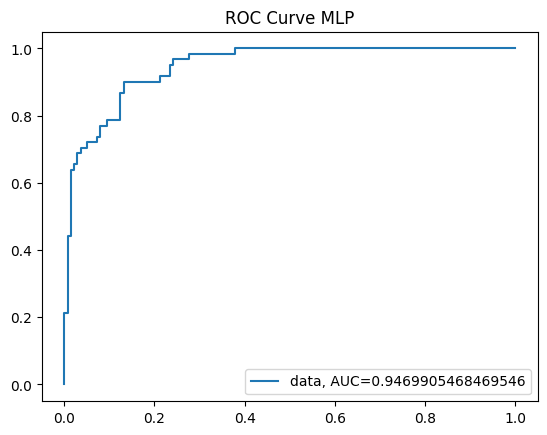

The score for the AUC ROC Curve is: 95.0%


In [ ]:
FPRate, TPRate, Threshold = roc_curve(y_test, y_MLP_pred_prob)
AUC = roc_auc_score(y_test, y_MLP_pred_prob)
plt.plot(FPRate,TPRate,label="data, AUC="+str(AUC))
plt.legend(loc=4)
plt.title ('ROC Curve MLP')
plt.show()

print(f"The score for the AUC ROC Curve is: {round(AUC,2)*100}%")

### **Dicision Tree**

In [ ]:
# Decision Tree
classifierDT = DecisionTreeClassifier()
classifierDT.fit(X_train, y_train)
y_pred_val_DT = classifierDT.predict(X_validation)
print("************Results for Decision Tree*************")
print("Confusion Matrix for Validation Set\n")
print(classification_report(y_validation, y_pred_val_DT))

************Results for Decision Tree*************
Confusion Matrix for Validation Set

              precision    recall  f1-score   support

           0       0.89      0.93      0.91        98
           1       0.88      0.82      0.84        60

    accuracy                           0.89       158
   macro avg       0.88      0.87      0.88       158
weighted avg       0.89      0.89      0.89       158



In [ ]:
y_pred_test_DT = classifierDT.predict(X_test)
print("************Results for Decision Tree*************")
print("Confusion Matrix for Test Set\n")
print(classification_report(y_test, y_pred_test_DT))

************Results for Decision Tree*************
Confusion Matrix for Test Set

              precision    recall  f1-score   support

           0       0.91      0.82      0.87       137
           1       0.68      0.82      0.74        61

    accuracy                           0.82       198
   macro avg       0.79      0.82      0.80       198
weighted avg       0.84      0.82      0.83       198



In [ ]:
y_DT_pred_prob=classifierDT.predict_proba(X_test)[::,1]

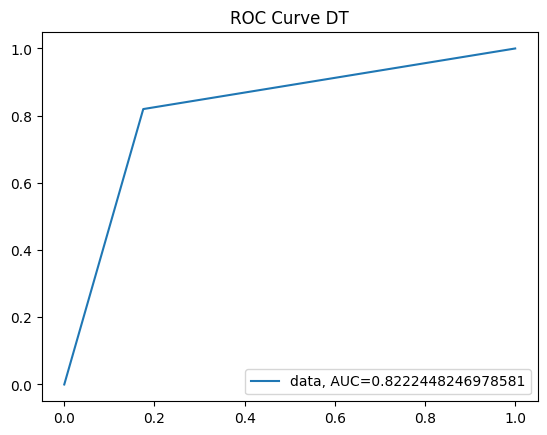

The score for the AUC ROC Curve is: 82.0%


In [ ]:
FPRate, TPRate, Threshold = roc_curve(y_test, y_DT_pred_prob)
AUC = roc_auc_score(y_test, y_DT_pred_prob)
plt.plot(FPRate,TPRate,label="data, AUC="+str(AUC))
plt.legend(loc=4)
plt.title ('ROC Curve DT')
plt.show()

print(f"The score for the AUC ROC Curve is: {round(AUC,2)*100}%")

###**Random Forest**

In [ ]:
# Random Forest
classifierRF = RandomForestClassifier(max_depth= 15,n_estimators=80)
classifierRF.fit(X_train, y_train)
y_pred_val_RF = classifierRF.predict(X_validation)
print("************Results for Random Forest*************")
print("Confusion Matrix for Validation Set\n")
print(classification_report(y_validation, y_pred_val_RF))

************Results for Random Forest*************
Confusion Matrix for Validation Set

              precision    recall  f1-score   support

           0       0.93      0.94      0.93        98
           1       0.90      0.88      0.89        60

    accuracy                           0.92       158
   macro avg       0.91      0.91      0.91       158
weighted avg       0.92      0.92      0.92       158



In [ ]:
# per_tree_pred_val = [tree.predict(X_validation) for tree in classifierRF.estimators_]

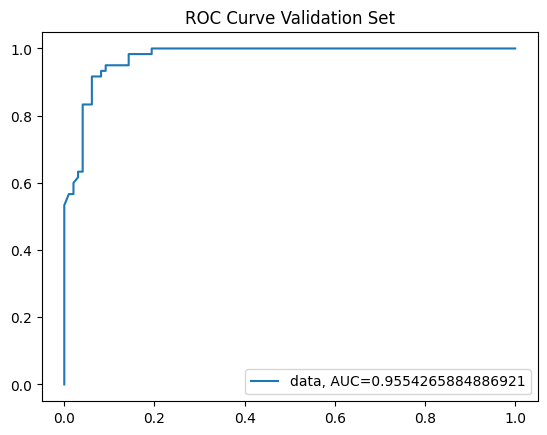

The score for the AUC ROC Curve is: 96.0%


In [ ]:
# FPRate, TPRate, not_imp = roc_curve(y_validation, mean_validation)
# AUC = roc_auc_score(y_test, mean)
# plt.plot(FPRate,TPRate,label="data, AUC="+str(AUC))
# plt.legend(loc=4)
# plt.title ('ROC Curve Validation Set')
# plt.show()

# print(f"The score for the AUC ROC Curve is: {round(AUC,2)*100}%")

In [ ]:
y_pred_test_RF = classifierRF.predict(X_test)
print("************Results for Random Forest*************")
print("Confusion Matrix for Test Set\n")
print(classification_report(y_test, y_pred_test_RF))

************Results for Random Forest*************
Confusion Matrix for Test Set

              precision    recall  f1-score   support

           0       0.95      0.91      0.93       137
           1       0.81      0.89      0.84        61

    accuracy                           0.90       198
   macro avg       0.88      0.90      0.88       198
weighted avg       0.90      0.90      0.90       198



In [ ]:
y_RF_pred_prob=classifierRF.predict_proba(X_test)[::,1]

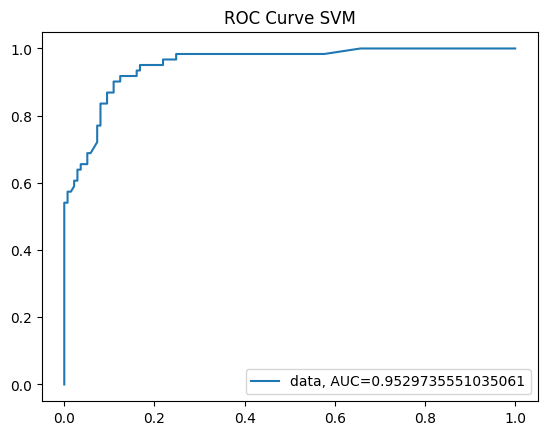

The score for the AUC ROC Curve is: 95.0%


In [ ]:
FPRate, TPRate, Threshold = roc_curve(y_test, y_RF_pred_prob)
AUC = roc_auc_score(y_test, y_RF_pred_prob)
plt.plot(FPRate,TPRate,label="data, AUC="+str(AUC))
plt.legend(loc=4)
plt.title ('ROC Curve RF')
plt.show()

print(f"The score for the AUC ROC Curve is: {round(AUC,2)*100}%")

First Model

In [ ]:
# Random Forest
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
classifierRF2 = RandomForestClassifier(max_depth= 15,n_estimators=25)
classifierRF2.fit(X_train, y_train)
y_pred_val_RF = classifierRF2.predict(X_validation)
print("************Results for Random Forest*************")
print("Confusion Matrix for Validation Set\n")
print(classification_report(y_validation, y_pred_val_RF))

************Results for Random Forest*************
Confusion Matrix for Validation Set

              precision    recall  f1-score   support

           0       0.91      0.92      0.91        98
           1       0.86      0.85      0.86        60

    accuracy                           0.89       158
   macro avg       0.89      0.88      0.89       158
weighted avg       0.89      0.89      0.89       158



In [ ]:
y_RF_pred_prob_val=classifierRF2.predict_proba(X_validation)[::,1]

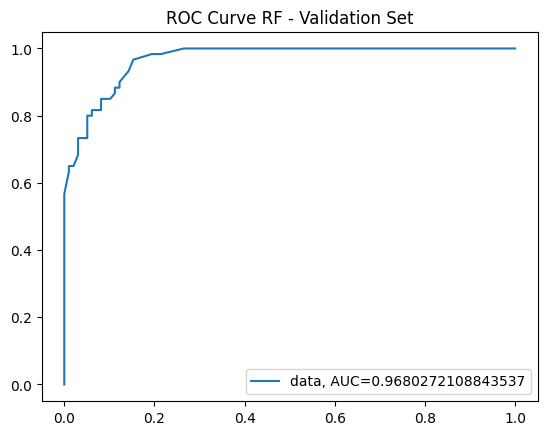

The score for the AUC ROC Curve is: 97.0%


In [ ]:
FPRate, TPRate, Threshold = roc_curve(y_validation, y_RF_pred_prob_val)
AUC = roc_auc_score(y_validation, y_RF_pred_prob_val)
plt.plot(FPRate,TPRate,label="data, AUC="+str(AUC))
plt.legend(loc=4)
plt.title ('ROC Curve RF - Validation Set')
plt.show()

print(f"The score for the AUC ROC Curve is: {round(AUC,2)*100}%")

In [ ]:
# Random Forest
y_pred_test_RF = classifierRF2.predict(X_test)
print("************Results for Random Forest*************")
print("Confusion Matrix for test Set\n")
print(classification_report(y_test, y_pred_test_RF))

************Results for Random Forest*************
Confusion Matrix for test Set

              precision    recall  f1-score   support

           0       0.95      0.89      0.92       137
           1       0.79      0.90      0.84        61

    accuracy                           0.89       198
   macro avg       0.87      0.90      0.88       198
weighted avg       0.90      0.89      0.90       198



In [ ]:
y_RF_pred_prob=classifierRF2.predict_proba(X_test)[::,1]

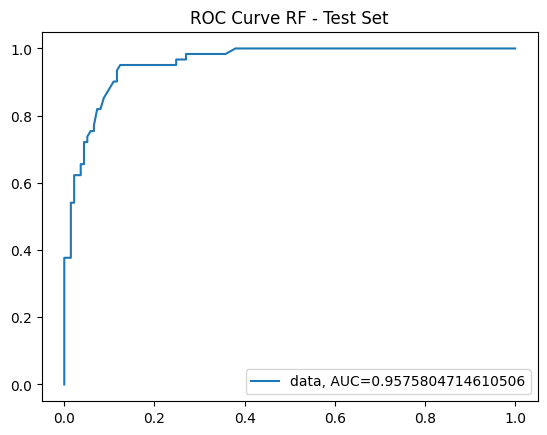

The score for the AUC ROC Curve is: 96.0%


In [ ]:
FPRate, TPRate, Threshold = roc_curve(y_test, y_RF_pred_prob)
AUC = roc_auc_score(y_test, y_RF_pred_prob)
plt.plot(FPRate,TPRate,label="data, AUC="+str(AUC))
plt.legend(loc=4)
plt.title ('ROC Curve RF - Test Set')
plt.show()

print(f"The score for the AUC ROC Curve is: {round(AUC,2)*100}%")

Text(0.5, 1.0, 'Confusion matrix RF\n')

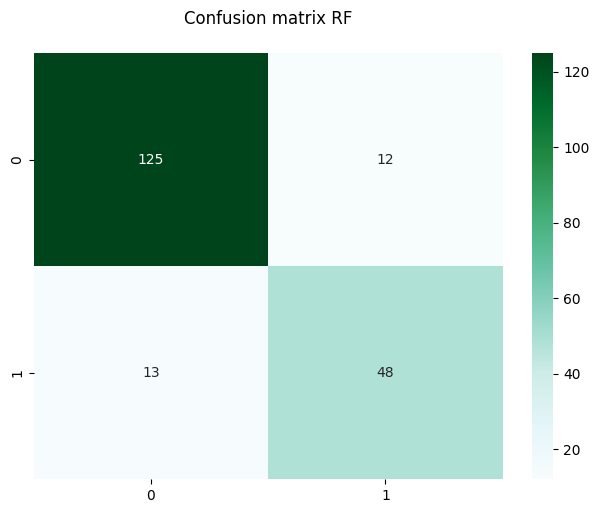

In [ ]:
#Plotting Confusion Matrix
confusion_matrix_RF = confusion_matrix(y_test,y_pred_test_RF)
sn.heatmap(confusion_matrix_RF , annot=True,cmap="BuGn" , fmt='g')
plt.tight_layout()
plt.title('Confusion matrix RF\n')

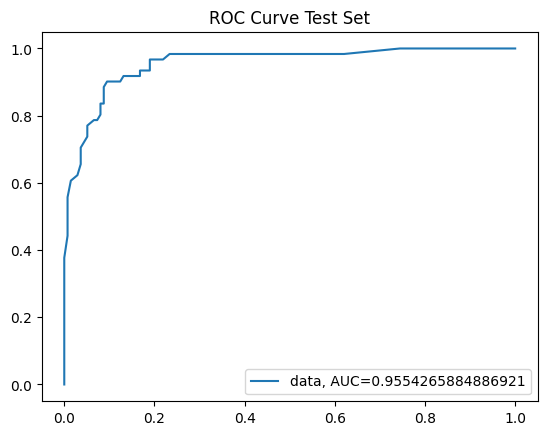

The score for the AUC ROC Curve is: 96.0%


In [ ]:
FPRate, TPRate, not_imp = roc_curve(y_test, mean)
AUC = roc_auc_score(y_test, mean)
plt.plot(FPRate,TPRate,label="data, AUC="+str(AUC))
plt.legend(loc=4)
plt.title ('ROC Curve Test Set')
plt.show()

print(f"The score for the AUC ROC Curve is: {round(AUC,2)*100}%")

###**Performance Comparision**

In [ ]:
from sklearn import metrics
models=['Support Vector Machine', 'Melti Layer Perceptron', 'Decision Tree', 'Random Forest Classifier']
accuracy=[y_pred_test_SVM, y_pred_test_MLP, y_pred_test_DT,y_pred_test_RF]

for i,j in zip(models,accuracy):
  print("Accuracy for {} : {}".format(i,round(metrics.accuracy_score(y_test,j),2)))

Accuracy for Support Vector Machine : 0.88
Accuracy for Melti Layer Perceptron : 0.87
Accuracy for Decision Tree : 0.83
Accuracy for Random Forest Classifier : 0.89


In [ ]:
FPRate_SVM, TPRate_SVM, Threshold_SVM = roc_curve(y_test, y_SVM_pred_prob)
FPRate_MLP, TPRate_MLP, Threshold_MLP = roc_curve(y_test, y_MLP_pred_prob)
FPRate_DT, TPRate_DT, Threshold_DT = roc_curve(y_test, y_DT_pred_prob)
FPRate_RF, TPRate_RF, Threshold_RF = roc_curve(y_test, y_RF_pred_prob)

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,6))

plt.plot(FPRate_SVM, TPRate_SVM,label="Support Vector Machine")
plt.plot(FPRate_MLP, TPRate_MLP,label="Multi Layer Perceptron")
plt.plot(FPRate_DT, TPRate_DT,label="Decision Tree")
plt.plot(FPRate_RF, TPRate_RF,label="Random Forest")

# Calculate AUC for each classifier
auc_svm = metrics.auc(FPRate_SVM, TPRate_SVM)
auc_mlp = metrics.auc(FPRate_MLP, TPRate_MLP)
auc_dt = metrics.auc(FPRate_DT, TPRate_DT)
auc_rf = metrics.auc(FPRate_RF, TPRate_RF)

# Display AUC values in legend
plt.legend(loc=4)
plt.grid(color='b', ls = '-.', lw = 0.25)
# Add AUC values to legend
plt.text(0.63, 0.06, f"AUC_SVM: {auc_svm:.2f}\nAUC_MLP: {auc_mlp:.2f}\nAUC_DT: {auc_dt:.2f}\nAUC_RF: {auc_rf:.2f}", transform=plt.gca().transAxes)
plt.show()

Based on evaluation metrics **Random Forest** has been chosen as the **best model**.

**Check the performance of the best model for some real_time data.**

In [ ]:
# Ground Truth: No_Touch
data = {'X_dist': [0.0477],	'Y_dist':[-0.5307],	'Z_dist': [-0.4818],	'distance':[0.7184] }
sample = pd.DataFrame.from_dict(data)
sample

,X_dist,Y_dist,Z_dist,distance
0,0.0477,-0.5307,-0.4818,0.7184


In [ ]:
classifierRF.predict(sample)

array([0])

In [ ]:
# 2.0576	0.5674	-0.0068	2.5077	0.7825	-0.1793	-0.4500	-0.2151	0.1725	0.5278
# Ground Truth: No_Touch

In [ ]:
data = {'X_dist': [-0.4500],	'Y_dist':[-0.2151],	'Z_dist': [0.1725],	'distance':[0.5278] }
sample = pd.DataFrame.from_dict(data)
sample

,X_dist,Y_dist,Z_dist,distance
0,-0.45,-0.2151,0.1725,0.5278


In [ ]:
y_predRF_test = classifierRF.predict(sample)
y_predRF_test

array([0])

In [ ]:
# 2.0821	0.5607	-0.2054	2.5076	0.7827	-0.1792	-0.4255	-0.2219	-0.0261	0.4807
# Ground Truth: No_Touch

In [ ]:
data = {'X_dist': [-0.4255],'Y_dist':[-0.2219],	'Z_dist': [-0.0261],	'distance':[0.4807] }
sample = pd.DataFrame.from_dict(data)
sample

,X_dist,Y_dist,Z_dist,distance
0,-0.4255,-0.2219,-0.0261,0.4807


In [ ]:
y_predRF_test = classifierRF.predict(sample)
y_predRF_test

array([0])

In [ ]:
# 2.6064	0.5590	-0.7042	2.5072	0.7827	-0.1795	0.0991	-0.2236	-0.5247	0.5789
# Ground Truth: No_Touch

In [ ]:
data = {'X_Ball':[2.6064],'Y_Ball':[0.5590],'Z_Ball':[-0.7042],'X_Turtle':[2.5072],'Y_Turtle': [0.7827],'Z_Turtle': [-0.1795],	'X_dist': [0.0991],'Y_dist':[-0.2236],	'Z_dist': [-0.5247],	'distance':[0.5789] }
sample = pd.DataFrame.from_dict(data)
sample

,X_Ball,Y_Ball,Z_Ball,X_Turtle,Y_Turtle,Z_Turtle,X_dist,Y_dist,Z_dist,distance
0,2.6064,0.559,-0.7042,2.5072,0.7827,-0.1795,0.0991,-0.2236,-0.5247,0.5789


In [ ]:
y_predRF_test = classifierRF.predict(sample)
y_predRF_test

array([0])

In [ ]:
#Ground Truth: No Touch
# 5.0089	0.1061	-2.3813	2.1083	0.7874	-1.2885	2.9005	-0.6813	-1.0927	3.1735

In [ ]:
data = {'X_dist': [2.9005],'Y_dist':[-0.6813],	'Z_dist': [-1.0927],	'distance':[3.1735] }
sample = pd.DataFrame.from_dict(data)
sample

,X_dist,Y_dist,Z_dist,distance
0,2.9005,-0.6813,-1.0927,3.1735


In [ ]:
y_predRF_test = classifierRF.predict(sample)
y_predRF_test

array([0])

In [ ]:
# We don't need to use it anymore because this part now is done in Matlab
#  Define a function for feature extracting
# def feature_extractor(file):
#     # Reading Data
#     data = pd.read_csv(file)
#     # Choosing the ball and the turtle positions
#     targeted_columns = data.iloc[1:, [5,6,7,12,13,14]][4:]
#     # Define a header
#     targeted_columns.columns=['X_Ball', 'Y_Ball', 'Z_Ball', 'X_Turtle', 'Y_Turtle', 'Z_Turtle']
#     # Delete missing Values
#     targeted_columns = targeted_columns.dropna()
#     # Reset the index of the DataFrame
#     targeted_columns = targeted_columns.reset_index(drop=True)
#     cleaned_data = targeted_columns
#     cleaned_data = cleaned_data.apply(pd.to_numeric)
#     cleaned_data['X_dist']= cleaned_data['X_Ball'] - cleaned_data['X_Turtle']
#     cleaned_data['Y_dist']= cleaned_data['Y_Ball'] - cleaned_data['Y_Turtle']
#     cleaned_data['Z_dist']= cleaned_data['Z_Ball'] - cleaned_data['Z_Turtle']
#     cleaned_data['distance'] =  np.sqrt(cleaned_data['X_dist']**2 + cleaned_data['Y_dist']**2 + cleaned_data['Z_dist']**2)
#     return cleaned_data.iloc[:,6:]

**Saving RF Model**

In [ ]:
joblib.dump(classifierRF, "RFClassifier")

['RFClassifier']

In [ ]:
RF_Classifier = joblib.load("RFClassifier")